In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/indian-personal-finance-and-spending-habits.csv')
data_df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


### 제안 5: 도시 등급에 따른 소비 및 저축 행동 분석
- 문제 정의
  - 도시 등급(Tier_1, Tier_2, Tier_3)에 따라 소비 및 저축 행동의 차이를 분석합니다.
- 분석 목표
  - 도시 등급별 주요 지출 항목의 평균값을 비교합니다.
  - 도시 등급별 소비 습관과 저축 비율의 차이를 확인합니다.
  - 도시 등급별 절약 가능성이 높은 항목을 식별합니다.
- 배경
  - 이를 통해 지역별 맞춤형 재정 관리 및 소비 최적화 방안을 제시할 수 있습니다.

### 결론
- 분석 정리 
  - 도시별 지출 차이 
    - Tier_1이 소득 대비 지출이 82.5%로 가장 높았다. 지출액도 33912로 가장 많았다.
  - 도시별 주요 소비 항목
    - 모든 도시에서 Rent가 가장 지출이 많았다.
    - 그다음 Groceries 의 지출이 많았다.
  - 도시별 저축 가능 비율
    - 가설: 가처분소득 대비 목표저축액의 비율이 높을 수록 목표저축액을 실제 저축할 가능성이 높을 것이다.
    - Tier_3이 67.6%로 목표저축액을 저축할 가능성이 가장 높다.
  - 도시별 절약 가능 비용
- 최종 결론 
  - 도시별 소비 절약 항목에 대한 저축 가능액 비용 증가 
  - 실제 저축 액 데이터를 확보해서 수익 대비 가처분소득과 실제 저축간의 관계가 대립가설인지 확인 필요

### 목표.1
- 도시 등급별 주요 지출 항목의 평균값을 비교합니다.
  - City_Tier , object
  - major_expenses, 주요지출 (Income - Disposable_Income)
    - Rent, float64, 임대료
    - Loan_Repayment, float64, 대출 상환금
    - Insurance, float64, 보험료 
    - Groceries, float64, 식료품비
    - Transport, float64, 교통비
    - Eating_Out, float64, 외식비
    - Entertainment, float64, 오락비
    - Utilities, float64, 공과금
    - Healthcare, float64, 의료비
    - Education, float64, 교육비
    - Miscellaneous, float64, 기타 지출

In [2]:
data_df['major_expenses'] = data_df['Income'] - data_df['Disposable_Income']

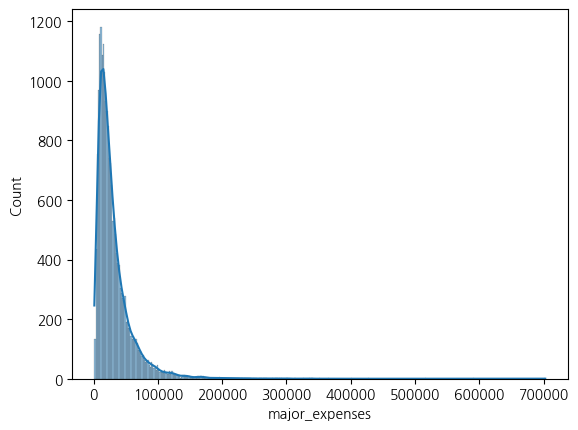

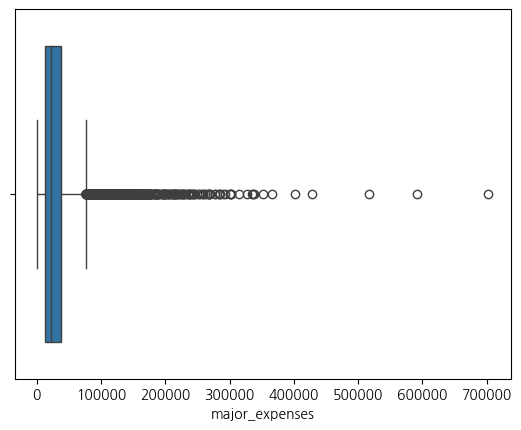

In [3]:
sns.histplot(data=data_df, x='major_expenses', kde=True)
plt.show()
sns.boxplot(data=data_df, x='major_expenses')
plt.show()

In [4]:
city_stats = data_df.groupby('City_Tier')['major_expenses'].describe()
print("\n도시 등급별 주요 지출 통계:")
print(city_stats)


도시 등급별 주요 지출 통계:
             count          mean           std          min           25%  \
City_Tier                                                                   
Tier_1      5934.0  33912.493262  32476.053163  1137.103539  14364.332759   
Tier_2     10068.0  30227.245326  29643.293782  1055.068764  12652.895473   
Tier_3      3998.0  28313.640818  27510.803637   988.427114  11642.480183   

                    50%           75%            max  
City_Tier                                             
Tier_1     24395.188923  42245.121610  401875.953968  
Tier_2     21988.919399  37708.758796  702668.155036  
Tier_3     20036.168654  35055.230159  428062.168154  


In [5]:
avg_by_city = data_df.groupby('City_Tier')['major_expenses'].mean().sort_values(ascending=False)
print("\n도시 등급별 평균 지출액:")
print(avg_by_city)



도시 등급별 평균 지출액:
City_Tier
Tier_1    33912.493262
Tier_2    30227.245326
Tier_3    28313.640818
Name: major_expenses, dtype: float64



도시별 소득 대비 지출 분석:
             Income  major_expenses  expense_to_income_ratio
City_Tier                                                   
Tier_1     41068.39        33912.49                    82.58
Tier_2     41713.21        30227.25                    72.46
Tier_3     42031.39        28313.64                    67.36


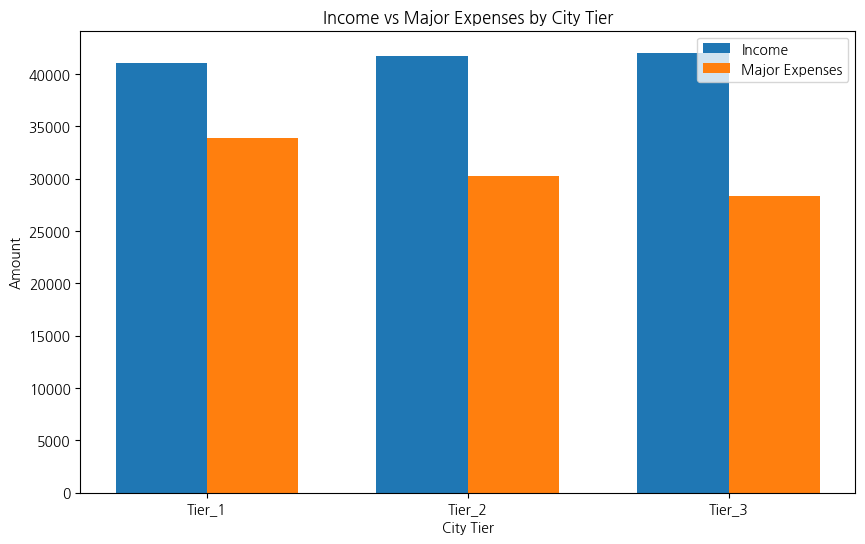

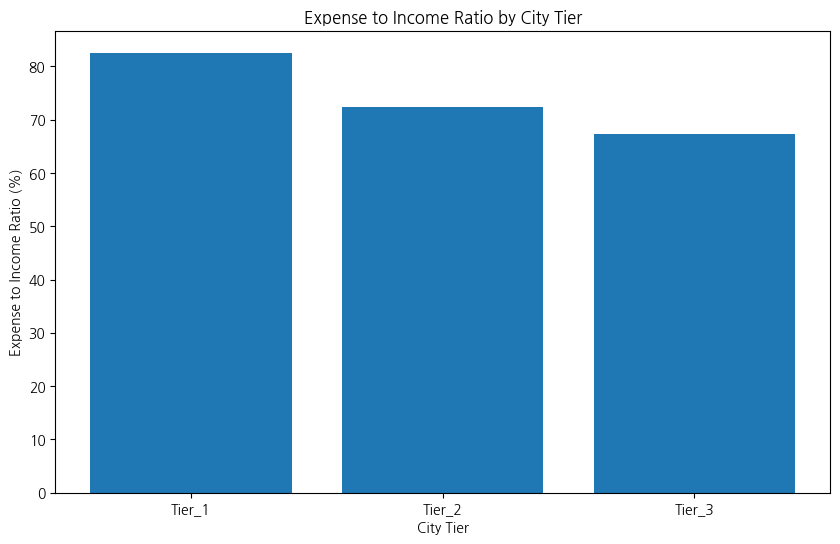

In [21]:
# 도시별 평균 소득과 지출 계산
city_analysis = data_df.groupby('City_Tier').agg({
    'Income': 'mean',
    'major_expenses': 'mean'
}).round(2)

# 소득 대비 지출 비율 계산
city_analysis['expense_to_income_ratio'] = (city_analysis['major_expenses'] / city_analysis['Income'] * 100).round(2)

print("\n도시별 소득 대비 지출 분석:")
print(city_analysis)

# 시각화 1: 소득과 지출 비교
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(city_analysis.index))

plt.bar(index, city_analysis['Income'], bar_width, label='Income')
plt.bar(index + bar_width, city_analysis['major_expenses'], bar_width, label='Major Expenses')

plt.title('Income vs Major Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.xticks(index + bar_width/2, city_analysis.index)
plt.legend()
plt.show()

# 시각화 2: 소득 대비 지출 비율
plt.figure(figsize=(10, 6))
plt.bar(city_analysis.index, city_analysis['expense_to_income_ratio'])
plt.title('Expense to Income Ratio by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Expense to Income Ratio (%)')
plt.show()

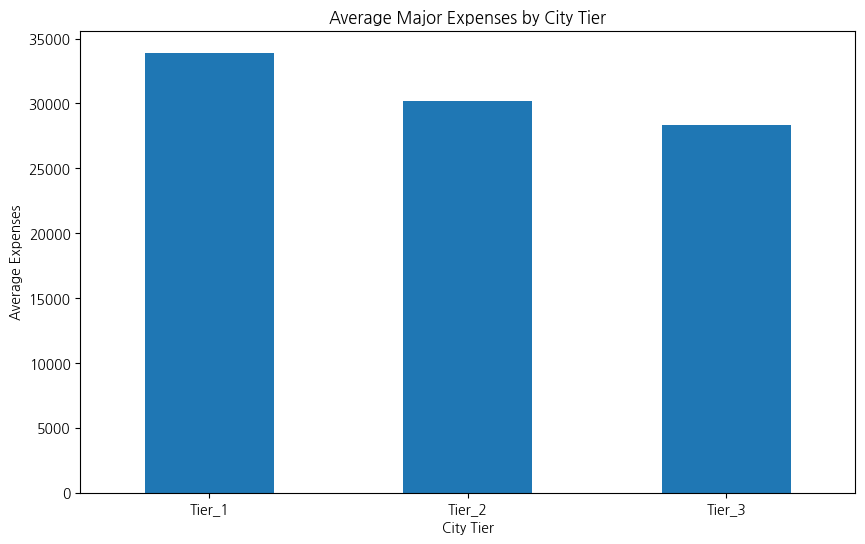

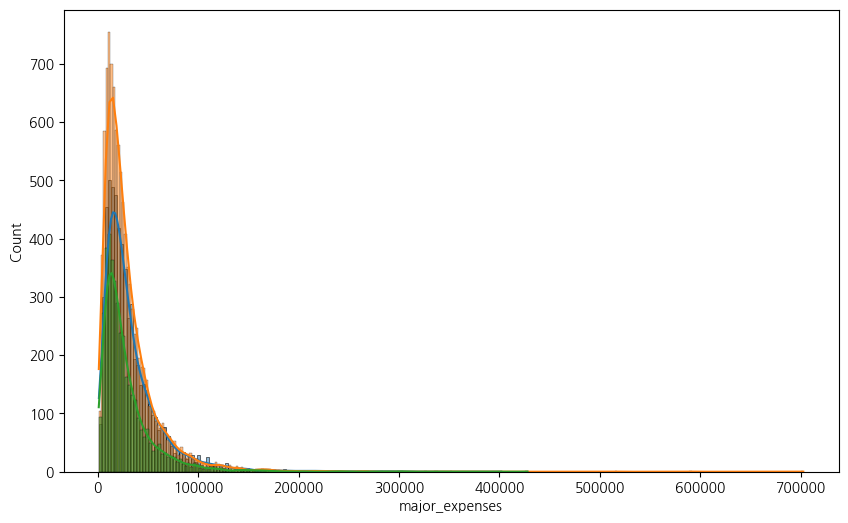

In [6]:
# 2. 바 차트로 평균값 비교
plt.figure(figsize=(10, 6))
avg_by_city.plot(kind='bar')
plt.title('Average Major Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
for tier in data_df['City_Tier'].unique():
    sns.histplot(data=data_df[data_df['City_Tier']==tier]['major_expenses'], kde=True)

plt.show()

### 목표.2
- 도시 등급별 소비 습관과 저축 비율의 차이를 확인합니다.
  - City_Tier , object
  - 소비 항목
    - Rent, float64, 임대료
    - Loan_Repayment, float64, 대출 상환금
    - Insurance, float64, 보험료 
    - Groceries, float64, 식료품비
    - Transport, float64, 교통비
    - Eating_Out, float64, 외식비
    - Entertainment, float64, 오락비
    - Utilities, float64, 공과금
    - Healthcare, float64, 의료비
    - Education, float64, 교육비
    - Miscellaneous, float64, 기타 지출
  - 목표 저축률, 목표 저축액 
    - Desired_Savings , float64
    - Desired_Savings_Percentage , float64

In [23]:
expense_items = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 
                'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 
                'Healthcare', 'Education', 'Miscellaneous']

# 각 지출 항목별 도시 등급 비교
city_expenses = data_df.groupby('City_Tier')[expense_items].mean()
print("\n도시 등급별 지출 항목 평균:")
print(city_expenses)


도시 등급별 지출 항목 평균:
                   Rent  Loan_Repayment    Insurance    Groceries  \
City_Tier                                                           
Tier_1     12320.517019     2038.067764  1449.456731  5145.997954   
Tier_2      8342.642141     2062.590409  1455.577849  5214.862936   
Tier_3      6304.708231     2035.005373  1461.916256  5271.075027   

             Transport   Eating_Out  Entertainment    Utilities   Healthcare  \
City_Tier                                                                      
Tier_1     2673.731634  1437.403507    1425.165051  2470.979031  1642.228495   
Tier_2     2711.042395  1467.438830    1457.183765  2515.100932  1670.562128   
Tier_3     2733.525601  1484.095316    1463.035915  2529.943299  1675.195722   

             Education  Miscellaneous  
City_Tier                              
Tier_1     2487.245367     821.700709  
Tier_2     2498.943079     831.300863  
Tier_3     2513.330542     841.809537  



도시별 총 지출 대비 항목별 지출 비율(%):
            Rent  Loan_Repayment  Insurance  Groceries  Transport  Eating_Out  \
City_Tier                                                                       
Tier_1     36.33            6.01       4.27      15.17       7.88        4.24   
Tier_2     27.60            6.82       4.82      17.25       8.97        4.85   
Tier_3     22.27            7.19       5.16      18.62       9.65        5.24   

           Entertainment  Utilities  Healthcare  Education  Miscellaneous  
City_Tier                                                                  
Tier_1              4.20       7.29        4.84       7.33           2.42  
Tier_2              4.82       8.32        5.53       8.27           2.75  
Tier_3              5.17       8.94        5.92       8.88           2.97  


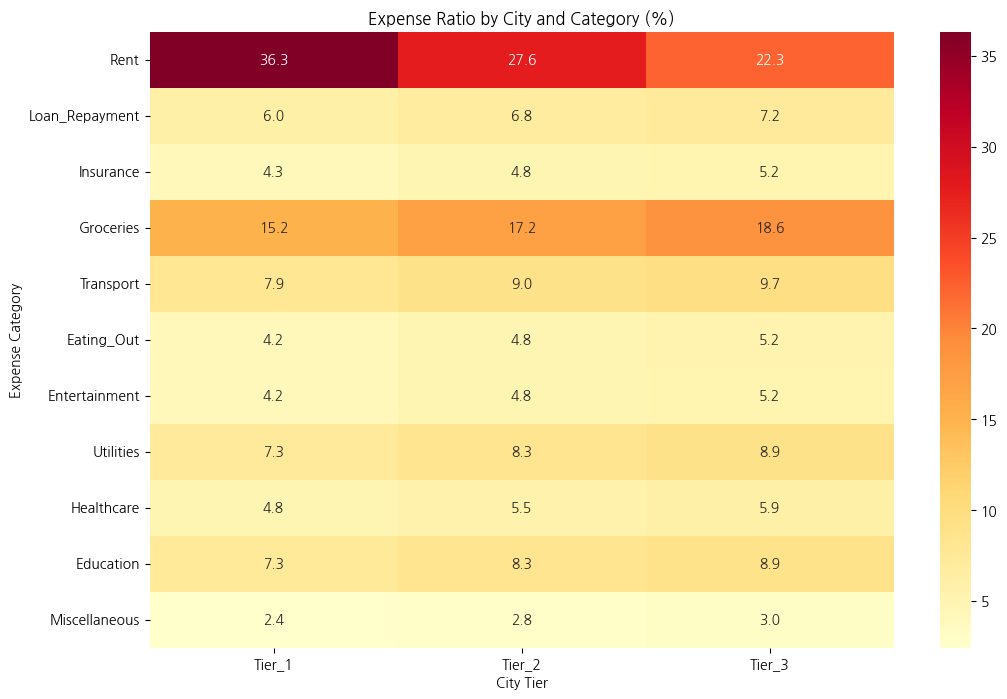

<Figure size 1200x600 with 0 Axes>

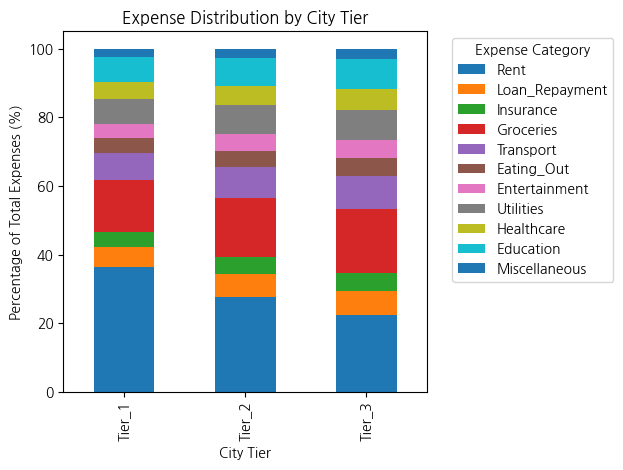


항목별 평균 비율(%):
Rent              28.733333
Groceries         17.013333
Transport          8.833333
Utilities          8.183333
Education          8.160000
Loan_Repayment     6.673333
Healthcare         5.430000
Eating_Out         4.776667
Insurance          4.750000
Entertainment      4.730000
Miscellaneous      2.713333
dtype: float64


In [24]:
# 도시별 총 지출과 항목별 지출 계산
city_expenses = data_df.groupby('City_Tier')[['major_expenses'] + expense_items].mean()

# 각 항목의 비율 계산
for item in expense_items:
    ratio_column = f'{item}_ratio'
    city_expenses[ratio_column] = (city_expenses[item] / city_expenses['major_expenses'] * 100).round(2)

# 비율만 선택
ratio_columns = [f'{item}_ratio' for item in expense_items]
expense_ratios = city_expenses[ratio_columns]
expense_ratios.columns = expense_items  # 컬럼명 단순화

print("\n도시별 총 지출 대비 항목별 지출 비율(%):")
print(expense_ratios)

# 시각화 1: 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(expense_ratios.T, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Expense Ratio by City and Category (%)')
plt.ylabel('Expense Category')
plt.xlabel('City Tier')
plt.show()

# 시각화 2: 누적 막대 그래프
plt.figure(figsize=(12, 6))
expense_ratios.plot(kind='bar', stacked=True)
plt.title('Expense Distribution by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Percentage of Total Expenses (%)')
plt.legend(title='Expense Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 전체 평균 비율
print("\n항목별 평균 비율(%):")
print(expense_ratios.mean().sort_values(ascending=False))

<Figure size 1500x800 with 0 Axes>

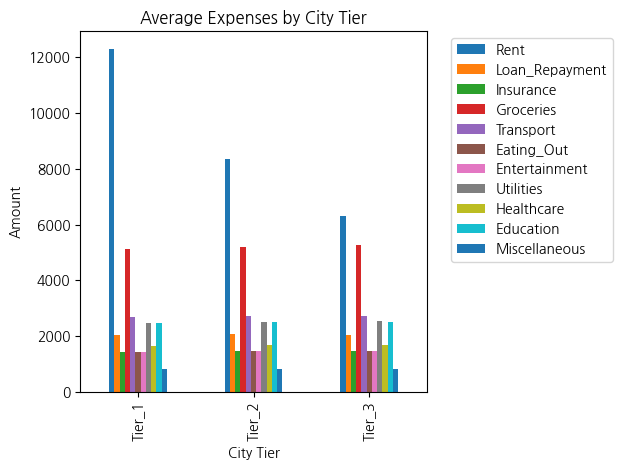

In [8]:
# 시각화
plt.figure(figsize=(15, 8))
city_expenses.plot(kind='bar')
plt.title('Average Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [9]:
savings_analysis = data_df.groupby('City_Tier').agg({
    'Desired_Savings_Percentage': 'mean',  # 목표 저축률
    'Desired_Savings': 'mean',            # 목표 저축액
    'Income': 'mean',                     # 평균 수입
    'Disposable_Income': 'mean'           # 평균 가처분소득
}).round(2)

# 실제 저축 가능액 추정
savings_analysis['Estimated_Savings'] = (
    savings_analysis['Income'] * 
    savings_analysis['Desired_Savings_Percentage'] / 100
)

print("\n도시 등급별 저축 관련 지표:")
print(savings_analysis)


도시 등급별 저축 관련 지표:
           Desired_Savings_Percentage  Desired_Savings    Income  \
City_Tier                                                          
Tier_1                           9.77          4406.66  41068.39   
Tier_2                           9.81          5172.18  41713.21   
Tier_3                           9.85          5361.42  42031.39   

           Disposable_Income  Estimated_Savings  
City_Tier                                        
Tier_1               7155.90        4012.381703  
Tier_2              11485.97        4092.065901  
Tier_3              13717.75        4140.091915  



도시 등급별 저축 가능성 분석:
           Disposable_Income  Desired_Savings  can_save  savings_margin  \
City_Tier                                                                 
Tier_1               7155.90          4406.66      0.98         2749.24   
Tier_2              11485.97          5172.18      1.00         6313.78   
Tier_3              13717.75          5361.42      1.00         8356.33   

           can_save_percentage  
City_Tier                       
Tier_1                    98.0  
Tier_2                   100.0  
Tier_3                   100.0  


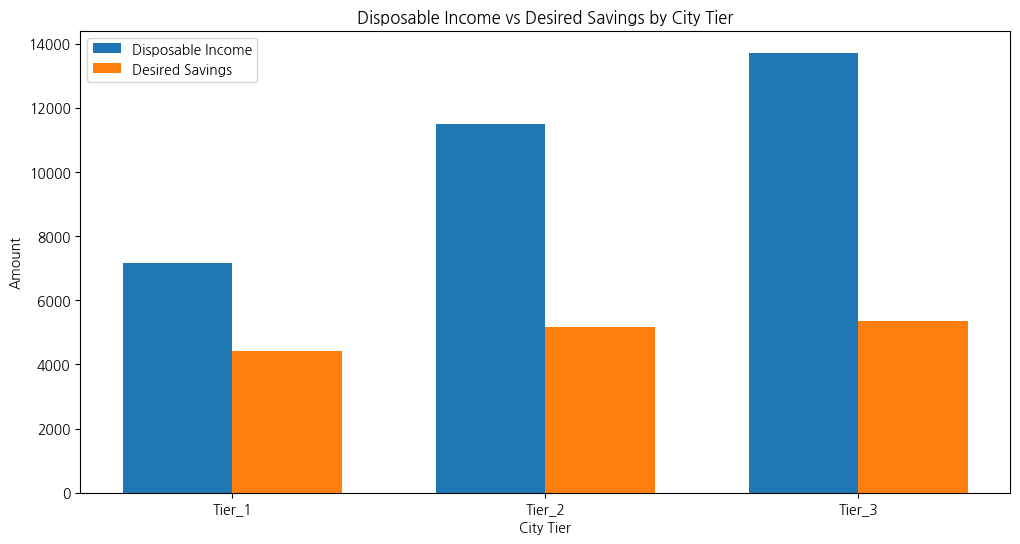

In [10]:
# 저축 가능성 분석
data_df['can_save'] = data_df['Disposable_Income'] >= data_df['Desired_Savings']
data_df['savings_margin'] = data_df['Disposable_Income'] - data_df['Desired_Savings']

# 도시별 분석
city_savings_analysis = data_df.groupby('City_Tier').agg({
    'Disposable_Income': 'mean',
    'Desired_Savings': 'mean',
    'can_save': 'mean',  # True의 비율
    'savings_margin': 'mean'
}).round(2)

# 백분율로 변환
city_savings_analysis['can_save_percentage'] = (city_savings_analysis['can_save'] * 100)

print("\n도시 등급별 저축 가능성 분석:")
print(city_savings_analysis)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(city_savings_analysis.index))

plt.bar(index, city_savings_analysis['Disposable_Income'], bar_width, 
        label='Disposable Income')
plt.bar(index + bar_width, city_savings_analysis['Desired_Savings'], bar_width,
        label='Desired Savings')

plt.title('Disposable Income vs Desired Savings by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.xticks(index + bar_width/2, city_savings_analysis.index)
plt.legend()
plt.show()


도시 등급별 저축 분석:
           Disposable_Income  Desired_Savings  savings_margin_ratio  \
City_Tier                                                             
Tier_1               7155.90          4406.66                 42.55   
Tier_2              11485.97          5172.18                 60.64   
Tier_3              13717.75          5361.42                 67.58   

           desired_savings_ratio  
City_Tier                         
Tier_1                     57.45  
Tier_2                     39.36  
Tier_3                     32.42  


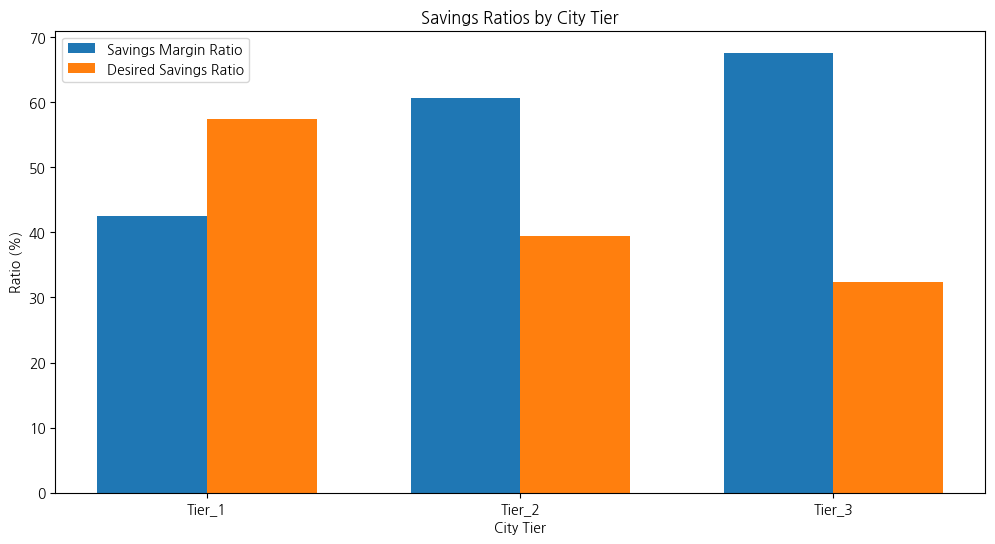

In [11]:
# 비율 계산
data_df['savings_margin_ratio'] = (data_df['savings_margin'] / data_df['Disposable_Income']) * 100
data_df['desired_savings_ratio'] = (data_df['Desired_Savings'] / data_df['Disposable_Income']) * 100

# 도시별 분석
city_savings_analysis = data_df.groupby('City_Tier').agg({
    'Disposable_Income': 'mean',
    'Desired_Savings': 'mean',
    'savings_margin_ratio': 'mean',
    'desired_savings_ratio': 'mean'
}).round(2)

print("\n도시 등급별 저축 분석:")
print(city_savings_analysis)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(city_savings_analysis.index))

plt.bar(index, city_savings_analysis['savings_margin_ratio'], bar_width, 
        label='Savings Margin Ratio')
plt.bar(index + bar_width, city_savings_analysis['desired_savings_ratio'], bar_width,
        label='Desired Savings Ratio')

plt.title('Savings Ratios by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Ratio (%)')
plt.xticks(index + bar_width/2, city_savings_analysis.index)
plt.legend()
plt.show()

### 목표.3 
- 도시 등급별 절약 가능성이 높은 항목을 식별합니다.
  - City_Tier , object
  - major_Potential_Savings_expenses 주요 지출에 대한 잠재 절약액
    - Potential_Savings_Groceries
    - Potential_Savings_Transport
    - Potential_Savings_Entertainment
    - Potential_Savings_Utilities
    - Potential_Savings_Healthcare
    - Potential_Savings_Education
    - Potential_Savings_Miscellaneous 

In [14]:
expense_items = ['Potential_Savings_Groceries', 'Potential_Savings_Transport', 
                 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 
                'Potential_Savings_Healthcare', 'Potential_Savings_Education', 
                'Potential_Savings_Miscellaneous']

# 각 지출 항목별 도시 등급 비교
city_expenses = data_df.groupby('City_Tier')[expense_items].mean()
print("\n도시 등급별 지출 항목 평균:")
print(city_expenses)


도시 등급별 지출 항목 평균:
           Potential_Savings_Groceries  Potential_Savings_Transport  \
City_Tier                                                             
Tier_1                      898.988363                   472.261638   
Tier_2                      911.696512                   474.401078   
Tier_3                      933.063092                   470.780986   

           Potential_Savings_Entertainment  Potential_Savings_Utilities  \
City_Tier                                                                 
Tier_1                          250.494876                   434.185804   
Tier_2                          253.999550                   437.973142   
Tier_3                          259.358952                   435.388697   

           Potential_Savings_Healthcare  Potential_Savings_Education  \
City_Tier                                                              
Tier_1                        40.861047                    62.216760   
Tier_2                        41.6

<Figure size 1500x800 with 0 Axes>

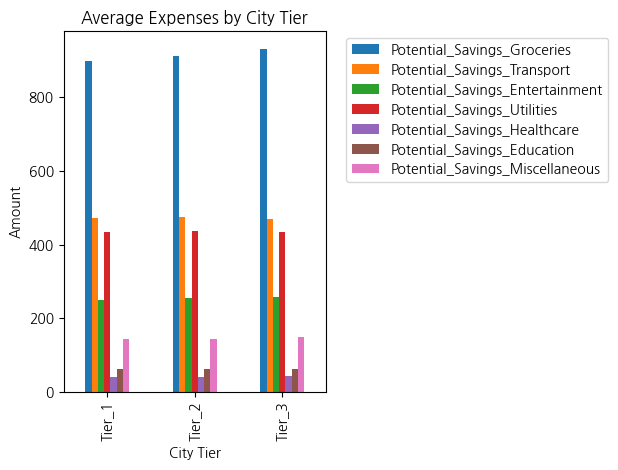

In [15]:
# 시각화
plt.figure(figsize=(15, 8))
city_expenses.plot(kind='bar')
plt.title('Average Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### 지역별 재정 관리 및 소비 최적화 
- 지역별 소비를 줄이는 방안
- 지역별 저축을 늘리는 방안

In [16]:
expense_items = ['Groceries', 'Transport', 
                 'Entertainment', 'Utilities', 
                'Healthcare', 'Education', 
                'Miscellaneous']

Potential_Savings_items = ['Potential_Savings_Groceries', 'Potential_Savings_Transport', 
                 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 
                'Potential_Savings_Healthcare', 'Potential_Savings_Education', 
                'Potential_Savings_Miscellaneous']



도시별 지출 항목 절감 가능 비율(%):
           Groceries  Transport  Entertainment  Utilities  Healthcare  \
City_Tier                                                               
Tier_1         17.43      17.48          17.58      17.56        2.48   
Tier_2         17.47      17.51          17.50      17.43        2.50   
Tier_3         17.68      17.35          17.55      17.37        2.51   

           Education  Miscellaneous  
City_Tier                            
Tier_1          2.55          17.52  
Tier_2          2.52          17.49  
Tier_3          2.46          17.53  


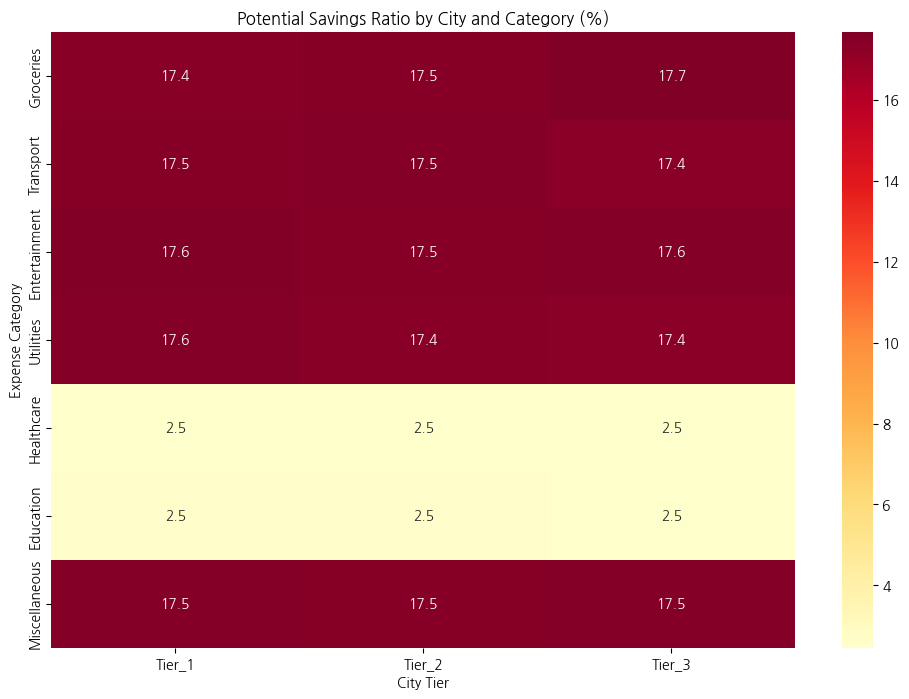

<Figure size 1500x800 with 0 Axes>

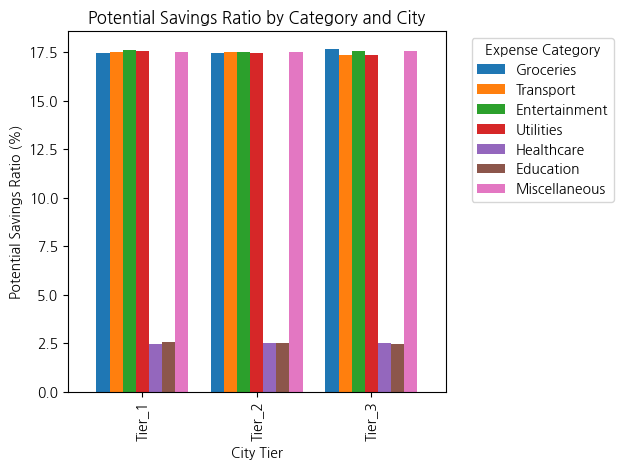


항목별 평균 절감 가능 비율(%):
Entertainment    17.543333
Groceries        17.526667
Miscellaneous    17.513333
Utilities        17.453333
Transport        17.446667
Education         2.510000
Healthcare        2.496667
dtype: float64


In [17]:
# 각 항목별 절감 비율 계산
for expense, potential in zip(expense_items, Potential_Savings_items):
    ratio_column = f'savings_ratio_{expense}'
    data_df[ratio_column] = (data_df[potential] / data_df[expense]) * 100

# 도시별 절감 비율 분석
savings_ratios = data_df.groupby('City_Tier')[
    [f'savings_ratio_{expense}' for expense in expense_items]
].mean().round(2)

# 컬럼명 단순화
savings_ratios.columns = expense_items

print("\n도시별 지출 항목 절감 가능 비율(%):")
print(savings_ratios)

# 시각화 1: 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(savings_ratios.T, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Potential Savings Ratio by City and Category (%)')
plt.ylabel('Expense Category')
plt.xlabel('City Tier')
plt.show()

# 시각화 2: 막대 그래프
plt.figure(figsize=(15, 8))
savings_ratios.plot(kind='bar', width=0.8)
plt.title('Potential Savings Ratio by Category and City')
plt.xlabel('City Tier')
plt.ylabel('Potential Savings Ratio (%)')
plt.legend(title='Expense Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 전체 평균 절감 가능 비율
print("\n항목별 평균 절감 가능 비율(%):")
print(savings_ratios.mean().sort_values(ascending=False))